### Marketing KPI Monitor & Alerting Dashboard

In [2]:
import pandas as pd          
import numpy as np
import matplotlib.pyplot as plt


In [13]:
#Creating the data for the project from the dictionary

data = {
    "date": [
        
        "2025-12-01","2025-12-02","2025-12-03","2025-12-04","2025-12-05",
        "2025-12-06","2025-12-07","2025-12-08","2025-12-09","2025-12-10",
        "2025-12-11","2025-12-12","2025-12-13","2025-12-14","2025-12-15",

        
        "2025-12-01","2025-12-02","2025-12-03","2025-12-04","2025-12-05",
        "2025-12-06","2025-12-07","2025-12-08","2025-12-09","2025-12-10",
        "2025-12-11","2025-12-12","2025-12-13","2025-12-14","2025-12-15"
    ],

    "channel": [
        *["Search"] * 15,
        *["Social"] * 15
    ],

    "campaign": [
        *["Brand_Search"] * 15,
        *["Prospecting_Social"] * 15
    ],

    "creative_id": [
        *["A1"] * 15,
        *["B7"] * 15
    ],

    "impressions": [
        
        12000,11800,12500,13000,12800,
        12700,12900,13100,13200,13400,
        13500,13600,13800,14000,14200,

        
        50000,52000,51000,53000,54000,
        55000,56000,57000,58000,59000,
        60000,61000,62000,63000,64000
    ],

    "clicks": [
        
        540,515,560,580,570,
        565,575,550,530,510,
        495,480,470,455,440,

        
        700,710,690,680,660,
        640,610,590,560,540,
        520,500,480,460,440
    ],

    "conversions": [
        
        60,58,62,61,60,
        59,60,55,52,50,
        48,46,45,43,42,

        
        25,24,23,21,20,
        18,16,14,12,11,
        10,9,8,7,6
    ],

    "revenue": [
        
        7200,6900,7600,7500,7400,
        7250,7350,6800,6400,6200,
        6000,5800,5600,5400,5200,

        
        2500,2400,2300,2100,2000,
        1800,1600,1400,1200,1100,
        1000,900,800,700,600
    ],

    "spend": [
        
        900,880,920,940,935,
        930,940,960,970,980,
        990,1000,1010,1020,1030,

        
        1400,1450,1420,1500,1520,
        1550,1600,1650,1700,1750,
        1800,1850,1900,1950,2000
    ]
}


In [4]:
df = pd.DataFrame(data)

In [5]:
df["date"] = pd.to_datetime(df["date"])
df.to_csv("campaign_daily.csv", index=False)
df.head(10)

,date,channel,campaign,creative_id,impressions,clicks,conversions,revenue,spend
0,2025-12-01,Search,Brand_Search,A1,12000,540,60,7200,900
1,2025-12-02,Search,Brand_Search,A1,11800,515,58,6900,880
2,2025-12-03,Search,Brand_Search,A1,12500,560,62,7600,920
3,2025-12-04,Search,Brand_Search,A1,13000,580,61,7500,940
4,2025-12-05,Search,Brand_Search,A1,12800,570,60,7400,935
5,2025-12-06,Search,Brand_Search,A1,12700,565,59,7250,930
6,2025-12-07,Search,Brand_Search,A1,12900,575,60,7350,940
7,2025-12-08,Search,Brand_Search,A1,13100,550,55,6800,960
8,2025-12-09,Search,Brand_Search,A1,13200,530,52,6400,970
9,2025-12-10,Search,Brand_Search,A1,13400,510,50,6200,980


In [6]:
# Helper function: safe division
def safe_div(numerator, denominator):
    denominator = denominator.replace(0, np.nan)
    return numerator / denominator

In [7]:
# KPI calculations
def add_kpis(df):
    df = df.copy()

    # CTR: % of impressions that became clicks
    df["ctr"] = safe_div(df["clicks"], df["impressions"])

    # CPC: cost of a single click
    df["cpc"] = safe_div(df["spend"], df["clicks"])

    # CVR: % of clicks that became conversions
    df["cvr"] = safe_div(df["conversions"], df["clicks"])

    # CPA: cost of one conversion
    df["cpa"] = safe_div(df["spend"], df["conversions"])

    # ROAS: revenue earned per $1 spent on ads
    df["roas"] = safe_div(df["revenue"], df["spend"])

    return df

In [14]:

dfk = add_kpis(df)
dfk.head()


,date,channel,campaign,creative_id,impressions,clicks,conversions,revenue,spend,ctr,cpc,cvr,cpa,roas
0,2025-12-01,Search,Brand_Search,A1,12000,540,60,7200,900,0.045000,1.666667,0.111111,15.000000,8.000000
1,2025-12-02,Search,Brand_Search,A1,11800,515,58,6900,880,0.043644,1.708738,0.112621,15.172414,7.840909
2,2025-12-03,Search,Brand_Search,A1,12500,560,62,7600,920,0.044800,1.642857,0.110714,14.838710,8.260870
3,2025-12-04,Search,Brand_Search,A1,13000,580,61,7500,940,0.044615,1.620690,0.105172,15.409836,7.978723
4,2025-12-05,Search,Brand_Search,A1,12800,570,60,7400,935,0.044531,1.640351,0.105263,15.583333,7.914439


In [27]:
daily = dfk.groupby("date", as_index=False).agg(
    impressions=("impressions","sum"),
    clicks=("clicks","sum"),
    conversions=("conversions","sum"),
    spend=("spend","sum"),
    revenue=("revenue","sum"),
)

daily["ctr"] = daily["clicks"] / daily["impressions"]
daily["cpa"] = daily["spend"] / daily["conversions"]
daily["roas"] = daily["revenue"] / daily["spend"]

daily.head()

,date,impressions,clicks,conversions,spend,revenue,ctr,cpa,roas
0,2025-12-01,62000,1240,85,2300,9700,0.020000,27.058824,4.217391
1,2025-12-02,63800,1225,82,2330,9300,0.019201,28.414634,3.991416
2,2025-12-03,63500,1250,85,2340,9900,0.019685,27.529412,4.230769
3,2025-12-04,66000,1260,82,2440,9600,0.019091,29.756098,3.934426
4,2025-12-05,66800,1230,80,2455,9400,0.018413,30.687500,3.828921


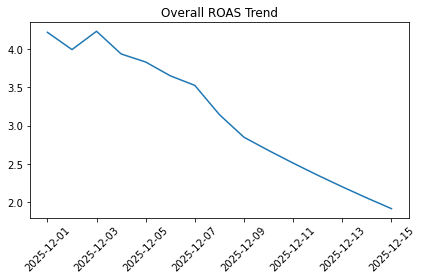

In [29]:
plt.figure()
plt.plot(daily["date"].to_numpy(), daily["roas"].to_numpy())
plt.title("Overall ROAS Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

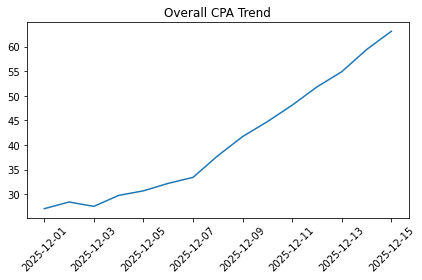

In [30]:
plt.figure()
plt.plot(daily["date"].to_numpy(), daily["cpa"].to_numpy())
plt.title("Overall CPA Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Alert Logic (Rolling Baseline)

We compare today's metric to a recent history window (default 7 days) **excluding today**:

- **ROAS drop:** rolling z-score ≤ -2  
- **CPA spike:** rolling z-score ≥ +2  
- **CTR drop:** CTR < 80% of rolling mean baseline

In [31]:
def rolling_zscore(series: pd.Series, window: int = 7) -> pd.Series:
    mean = series.shift(1).rolling(window).mean()
    std = series.shift(1).rolling(window).std(ddof=0).replace(0, np.nan)
    return (series - mean) / std

def detect_alerts(df: pd.DataFrame, window: int = 7) -> pd.DataFrame:
    df = df.copy()

    df["roas_z"] = df.groupby(["channel", "campaign"])["roas"].transform(lambda s: rolling_zscore(s, window))
    df["cpa_z"]  = df.groupby(["channel", "campaign"])["cpa"].transform(lambda s: rolling_zscore(s, window))

    df["alert_roas_drop"] = df["roas_z"] <= -2
    df["alert_cpa_spike"] = df["cpa_z"] >= 2

    ctr_baseline = df.groupby(["channel", "campaign"])["ctr"].transform(lambda s: s.shift(1).rolling(window).mean())
    df["alert_ctr_drop"] = (ctr_baseline.notna()) & (df["ctr"] < (0.8 * ctr_baseline))

    df["alert_reasons"] = ""
    df.loc[df["alert_roas_drop"], "alert_reasons"] += "ROAS_drop,"
    df.loc[df["alert_cpa_spike"], "alert_reasons"] += "CPA_spike,"
    df.loc[df["alert_ctr_drop"],  "alert_reasons"] += "CTR_drop,"
    df["alert_reasons"] = df["alert_reasons"].str.rstrip(",")
    df["has_alert"] = df["alert_reasons"].str.len() > 0

    return df

dfa = detect_alerts(dfk, window=7)
alerts = dfa[dfa["has_alert"]].copy()

alerts[[
    "date","channel","campaign","creative_id",
    "spend","revenue","ctr","cpa","roas",
    "roas_z","cpa_z","alert_reasons"
]].head(20)

,date,channel,campaign,creative_id,spend,revenue,ctr,cpa,roas,roas_z,cpa_z,alert_reasons
7,2025-12-08,Search,Brand_Search,A1,960,6800,0.041985,17.454545,7.083333,-5.807539,6.462303,"ROAS_drop,CPA_spike"
8,2025-12-09,Search,Brand_Search,A1,970,6400,0.040152,18.653846,6.597938,-3.660022,3.814924,"ROAS_drop,CPA_spike"
9,2025-12-10,Search,Brand_Search,A1,980,6200,0.038060,19.600000,6.326531,-2.432626,2.724586,"ROAS_drop,CPA_spike"
10,2025-12-11,Search,Brand_Search,A1,990,6000,0.036667,20.625000,6.060606,-2.047657,2.375373,"ROAS_drop,CPA_spike"
11,2025-12-12,Search,Brand_Search,A1,1000,5800,0.035294,21.739130,5.800000,-1.793898,2.159415,CPA_spike
22,2025-12-08,Social,Prospecting_Social,B7,1650,1400,0.010351,117.857143,0.848485,-2.173269,3.071444,"ROAS_drop,CPA_spike"
23,2025-12-09,Social,Prospecting_Social,B7,1700,1200,0.009655,141.666667,0.705882,-2.068222,3.069481,"ROAS_drop,CPA_spike,CTR_drop"
24,2025-12-10,Social,Prospecting_Social,B7,1750,1100,0.009153,159.090909,0.628571,-1.750639,2.499947,"CPA_spike,CTR_drop"
25,2025-12-11,Social,Prospecting_Social,B7,1800,1000,0.008667,180.000000,0.555556,-1.642277,2.337460,"CPA_spike,CTR_drop"
26,2025-12-12,Social,Prospecting_Social,B7,1850,900,0.008197,205.555556,0.486486,-1.528643,2.300235,"CPA_spike,CTR_drop"


In [21]:
def detect_alerts(df: pd.DataFrame, window: int = 7):
    df = df.copy()

    df["roas_z"] = df.groupby(["channel", "campaign"])["roas"].transform(lambda s: rolling_zscore(s, window))
    df["cpa_z"] = df.groupby(["channel", "campaign"])["cpa"].transform(lambda s: rolling_zscore(s, window))

    df["alert_roas_drop"] = df["roas_z"] <= -2
    df["alert_cpa_spike"] = df["cpa_z"] >= 2

    ctr_baseline = df.groupby(["channel", "campaign"])["ctr"].transform(lambda s: s.shift(1).rolling(window).mean())
    df["alert_ctr_drop"] = df["ctr"] < (0.8 * ctr_baseline)

    def label_row(r):
        reasons = []
        if bool(r["alert_roas_drop"]): reasons.append("ROAS_drop")
        if bool(r["alert_cpa_spike"]): reasons.append("CPA_spike")
        if bool(r["alert_ctr_drop"]):  reasons.append("CTR_drop")
        return ",".join(reasons)

    df["alert_reasons"] = df.apply(label_row, axis=1)
    df["has_alert"] = df["alert_reasons"].str.len() > 0
    return df



In [32]:
alerts.groupby(["date","alert_reasons"]).size().sort_values(ascending=False).head(10)

date        alert_reasons               
2025-12-08  ROAS_drop,CPA_spike             2
2025-12-09  ROAS_drop,CPA_spike             1
            ROAS_drop,CPA_spike,CTR_drop    1
2025-12-10  CPA_spike,CTR_drop              1
            ROAS_drop,CPA_spike             1
2025-12-11  CPA_spike,CTR_drop              1
            ROAS_drop,CPA_spike             1
2025-12-12  CPA_spike                       1
            CPA_spike,CTR_drop              1
2025-12-13  CPA_spike,CTR_drop              1
dtype: int64

In [35]:
alerts.to_csv("alerts_from_notebook.csv", index=False)

## Conclusion

- Built daily KPI calculations (CTR/CPC/CVR/CPA/ROAS)
- Implemented rolling-baseline anomaly detection for ROAS, CPA, and CTR
- Packaged the logic into an interactive Streamlit dashboard (`app.py`)